# 1. Установка пакета h2o

В Python устанавливаем пакет h2o с помощью строки ```pip install h2o```.

# 2. Запуск кластера H2O

In [1]:
# импортируем необходимую библиотеку
import h2o

# запускаем кластер H2O
h2o.init(nthreads=-1, max_mem_size=8)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.
Attempting to start a local H2O server...
  Java Version: java version "15.0.2" 2021-01-19; Java(TM) SE Runtime Environment (build 15.0.2+7-27); Java HotSpot(TM) 64-Bit Server VM (build 15.0.2+7-27, mixed mode, sharing)
  Starting server from /Users/artemgruzdev/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/x9/w1kvj6ms0p52l8j6crt19vmh0000gn/T/tmpj6okq5u6
  JVM stdout: /var/folders/x9/w1kvj6ms0p52l8j6crt19vmh0000gn/T/tmpj6okq5u6/h2o_artemgruzdev_started_from_python.out
  JVM stderr: /var/folders/x9/w1kvj6ms0p52l8j6crt19vmh0000gn/T/tmpj6okq5u6/h2o_artemgruzdev_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_artemgruzdev_mancpi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


# 3. Преобразование данных во фреймы H2O

## 3.1. Получение фреймов H2O из датафреймов pandas

In [2]:
# импортируем библиотеки pandas и numpy
import pandas as pd
import numpy as np

In [3]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/StateFarm_for_H2O.csv', sep=';')
data.head(3)

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response
0,65999,237,1,14,0,6,0
1,0,65,19,56,0,3,0
2,54500,63,28,17,0,6,0


In [4]:
# импортируем функцию train_test_split(), с помощью
# которой разбиваем данные на обучающие и тестовые
from sklearn.model_selection import train_test_split
# разбиваем данные на обучающие и тестовые: получаем обучающий
# массив признаков, тестовый массив признаков, обучающий массив
# меток, тестовый массив меток
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Response', axis=1), 
    data['Response'], 
    test_size=0.3,
    stratify=data['Response'],
    random_state=42)

In [5]:
# конкатенируем обучающие массив признаков и массив меток
train = pd.concat([X_train, y_train], axis=1)
# конкатенируем тестовые массив признаков и массив меток
test = pd.concat([X_test, y_test], 
                  axis=1)
# преобразовываем датафреймы pandas во фреймы h2o
tr = h2o.H2OFrame(train)
tst = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


## 3.2. Получение фреймов H2O напрямую

In [6]:
# загружаем данные в формате фрейма
data = h2o.upload_file(path='Data/StateFarm_for_H2O.csv') 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
# разбиваем фрейм на обучающий и тестовый
tr, tst = data.split_frame(ratios=[.7], seed=42)

# 4. Знакомство с содержимым фрейма

In [8]:
# смотрим содержимое фрейма
tr.describe()

Rows:5799
Cols:7




,﻿Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response
type,int,int,int,int,int,int,int
mins,0.0,61.0,0.0,0.0,0.0,1.0,0.0
mean,37865.85031902055,93.31401965856195,15.117261596827044,48.28694602517683,0.3821348508363507,2.990170719089499,0.09949991377823762
maxs,99961.0,298.0,35.0,99.0,5.0,9.0,1.0
sigma,30409.096303369428,34.75395002180724,10.092161225345725,27.74697967899083,0.9094184627653707,2.4063142665913926,0.29935787025903
zeros,1468,0,206,58,4605,0,5222
missing,0,0,0,0,0,0,0
0,65999.0,237.0,1.0,14.0,0.0,6.0,0.0
1,0.0,65.0,19.0,56.0,0.0,3.0,0.0
2,54500.0,63.0,28.0,17.0,0.0,6.0,0.0


In [9]:
# преобразовываем в категориальную переменную
tr['Response'] = tr['Response'].asfactor()
tst['Response'] = tst['Response'].asfactor()

In [10]:
# смотрим содержимое фрейма
tr.describe()

Rows:5799
Cols:7




,﻿Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response
type,int,int,int,int,int,int,enum
mins,0.0,61.0,0.0,0.0,0.0,1.0,
mean,37865.85031902055,93.31401965856195,15.117261596827044,48.28694602517683,0.3821348508363507,2.990170719089499,
maxs,99961.0,298.0,35.0,99.0,5.0,9.0,
sigma,30409.096303369428,34.75395002180724,10.092161225345725,27.74697967899083,0.9094184627653707,2.4063142665913926,
zeros,1468,0,206,58,4605,0,
missing,0,0,0,0,0,0,0
0,65999.0,237.0,1.0,14.0,0.0,6.0,0
1,0.0,65.0,19.0,56.0,0.0,3.0,0
2,54500.0,63.0,28.0,17.0,0.0,6.0,0


# 5. Определение имени зависимой переменной и списка имен предикторов

In [11]:
# задаем имя зависимой переменной
dependent = 'Response'
# задаем список имен предикторов
predictors = list(tr.columns)
# удаляем имя зависимой переменной 
# из списка имен предикторов
predictors.remove(dependent)

# 6. Обучение модели машинного обучения

In [12]:
# импортируем класс H2ORandomForestEstimator
from h2o.estimators import H2ORandomForestEstimator
# создаем экземпляр класса H2ORandomForestEstimator
forest_model = H2ORandomForestEstimator(seed=42)
# обучаем модель
forest_model.train(x=predictors, 
                   y=dependent, 
                   training_frame=tr, 
                   validation_frame=tst);

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


# 7. Вывод модели

In [13]:
# смотрим модель
forest_model

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1656419609068_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,294713.0,17.0,20.0,19.92,414.0,506.0,463.58




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.04619564763372571
RMSE: 0.21493172784334497
LogLoss: 0.3693878012757886
Mean Per-Class Error: 0.08679798904382008
AUC: 0.9457811472194362
AUCPR: 0.6697982301465149
Gini: 0.8915622944388724

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3176226465604006: 


,,0,1,Error,Rate
0,0,4949.0,273.0,0.0523,(273.0/5222.0)
1,1,70.0,507.0,0.1213,(70.0/577.0)
2,Total,5019.0,780.0,0.0591,(343.0/5799.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.317623,0.747237,210.0
1,max f2,0.257955,0.830183,232.0
2,max f0point5,0.363177,0.695677,196.0
3,max accuracy,0.363177,0.942404,196.0
4,max precision,0.827996,0.750000,51.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,0.996170,0.0
7,max absolute_mcc,0.312368,0.725017,211.0
8,max min_per_class_accuracy,0.227179,0.924358,245.0
9,max mean_per_class_accuracy,0.192454,0.926699,261.0



Gains/Lift Table: Avg response rate:  9,95 %, avg score: 13,38 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011726,1.000000,7.094301,7.094301,0.705882,1.000000,0.705882,1.000000,0.083189,0.083189,609.430115,609.430115,0.079359
1,2,0.020003,0.943232,6.490793,6.844574,0.645833,0.960290,0.681034,0.983568,0.053726,0.136915,549.079289,584.457360,0.129830
2,3,0.030005,0.900107,8.144176,7.277774,0.810345,0.924378,0.724138,0.963838,0.081456,0.218371,714.417618,627.777446,0.209179
3,4,0.040007,0.825845,8.317457,7.537695,0.827586,0.867226,0.750000,0.939685,0.083189,0.301560,731.745652,653.769497,0.290453
4,5,0.050009,0.777251,6.584653,7.347087,0.655172,0.801316,0.731034,0.912011,0.065858,0.367418,558.465308,634.708660,0.352481
5,6,0.100017,0.528105,6.446029,6.896558,0.641379,0.648841,0.686207,0.780426,0.322357,0.689775,544.602881,589.655770,0.654922
6,7,0.150026,0.254386,4.470633,6.087916,0.444828,0.375209,0.605747,0.645354,0.223570,0.913345,347.063288,508.791609,0.847661
7,8,0.200034,0.162500,0.727777,4.747881,0.072414,0.200446,0.472414,0.534127,0.036395,0.949740,-27.222255,374.788143,0.832544
8,9,0.300224,0.091667,0.051895,3.180754,0.005164,0.120798,0.316485,0.396192,0.005199,0.954939,-94.810537,218.075430,0.727057
9,10,0.403863,0.058824,0.066890,2.381680,0.006656,0.072412,0.236977,0.313104,0.006932,0.961872,-93.310975,138.167988,0.619666




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.047934206502402175
RMSE: 0.21893881908515486
LogLoss: 0.30493459250887994
Mean Per-Class Error: 0.08153095345684591
AUC: 0.9276565747853592
AUCPR: 0.6840568010950697
Gini: 0.8553131495707185

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3389321720600128: 


,,0,1,Error,Rate
0,0,2100.0,113.0,0.0511,(113.0/2213.0)
1,1,28.0,222.0,0.112,(28.0/250.0)
2,Total,2128.0,335.0,0.0572,(141.0/2463.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.338932,0.758974,140.0
1,max f2,0.270000,0.849890,156.0
2,max f0point5,0.422771,0.700271,126.0
3,max accuracy,0.338932,0.942753,140.0
4,max precision,0.989333,0.928571,1.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,0.999548,0.0
7,max absolute_mcc,0.270000,0.741291,156.0
8,max min_per_class_accuracy,0.218333,0.928604,177.0
9,max mean_per_class_accuracy,0.251333,0.933272,163.0



Gains/Lift Table: Avg response rate: 10,15 %, avg score: 13,80 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010556,0.973500,8.336308,8.336308,0.846154,0.989958,0.846154,0.989958,0.088,0.088,733.630769,733.630769,0.086192
1,2,0.020300,0.963003,7.799500,8.078640,0.791667,0.968177,0.820000,0.979503,0.076,0.164,679.950000,707.864000,0.159933
2,3,0.030451,0.939048,6.699360,7.618880,0.680000,0.950537,0.773333,0.969848,0.068,0.232,569.936000,661.888000,0.224318
3,4,0.040601,0.869091,5.911200,7.191960,0.600000,0.900563,0.730000,0.952527,0.060,0.292,491.120000,619.196000,0.279799
4,5,0.050345,0.817833,5.336500,6.832839,0.541667,0.845571,0.693548,0.931826,0.052,0.344,433.650000,583.283871,0.326829
5,6,0.100284,0.542247,6.648098,6.740842,0.674797,0.672261,0.684211,0.802569,0.332,0.676,564.809756,574.084211,0.640754
6,7,0.150223,0.244986,5.046146,6.177470,0.512195,0.395718,0.627027,0.667318,0.252,0.928,404.614634,517.747027,0.865641
7,8,0.200162,0.142400,0.320390,4.716170,0.032520,0.184617,0.478702,0.546888,0.016,0.944,-67.960976,371.617039,0.827868
8,9,0.300041,0.080390,0.000000,3.146241,0.000000,0.107791,0.319350,0.400720,0.000,0.944,-100.000000,214.624087,0.716707
9,10,0.399919,0.055741,0.000000,2.360479,0.000000,0.067270,0.239594,0.317442,0.000,0.944,-100.000000,136.047919,0.605545




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-28 15:33:33,0.042 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-06-28 15:33:33,0.214 sec,1.0,0.283558,2.030118,0.870049,0.454732,5.111275,0.098368,0.300895,2.364122,0.856338,0.431526,4.904858,0.107592
2,,2022-06-28 15:33:34,0.288 sec,2.0,0.287009,2.002123,0.859897,0.444081,5.044532,0.105293,0.259529,0.938197,0.902782,0.573632,7.060600,0.074706
3,,2022-06-28 15:33:34,0.338 sec,3.0,0.280683,1.749113,0.878661,0.471588,5.364447,0.104605,0.249111,0.724536,0.921770,0.604568,7.191960,0.079578
4,,2022-06-28 15:33:34,0.375 sec,4.0,0.281402,1.657437,0.877175,0.480889,5.553297,0.107348,0.240547,0.654511,0.927283,0.626827,7.247448,0.077548
5,,2022-06-28 15:33:34,0.413 sec,5.0,0.269926,1.373683,0.894821,0.517095,5.950001,0.099656,0.236172,0.626395,0.929896,0.637250,7.265850,0.065773
6,,2022-06-28 15:33:34,0.449 sec,6.0,0.265087,1.235211,0.900032,0.520898,5.983872,0.095221,0.232507,0.521302,0.930942,0.653682,7.881600,0.069022
7,,2022-06-28 15:33:34,0.478 sec,7.0,0.256385,1.025662,0.912511,0.551470,6.339949,0.087505,0.230315,0.520071,0.933039,0.657652,7.881600,0.069022
8,,2022-06-28 15:33:34,0.521 sec,8.0,0.251222,0.927220,0.916745,0.565364,6.463697,0.085649,0.228460,0.519293,0.932815,0.659713,7.881600,0.064555
9,,2022-06-28 15:33:34,0.552 sec,9.0,0.244572,0.835228,0.920737,0.590843,6.742579,0.079621,0.227426,0.506337,0.932465,0.660945,7.913902,0.061307



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,﻿Income,3106.957275,1.000000,0.239838
1,Months Since Policy Inception,2907.678955,0.935861,0.224455
2,Monthly Premium Auto,2650.987061,0.853242,0.204640
3,Months Since Last Claim,2577.038086,0.829441,0.198931
4,Number of Policies,1133.275757,0.364754,0.087482
5,Number of Open Complaints,578.466125,0.186184,0.044654


# 8. Получение прогнозов

In [14]:
# получаем спрогнозированные значения и спрогнозированные 
# вероятности классы зависимой переменной
predictions = forest_model.predict(tst)
predictions

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.542,0.458
0,0.928095,0.0719048
0,0.875667,0.124333
0,0.933,0.067
0,0.888,0.112
0,1,0
0,0.931667,0.0683333
0,0.96,0.04
0,0.808,0.192
0,1,0


# 9. Построение ROC-кривой и вычисление AUC-ROC

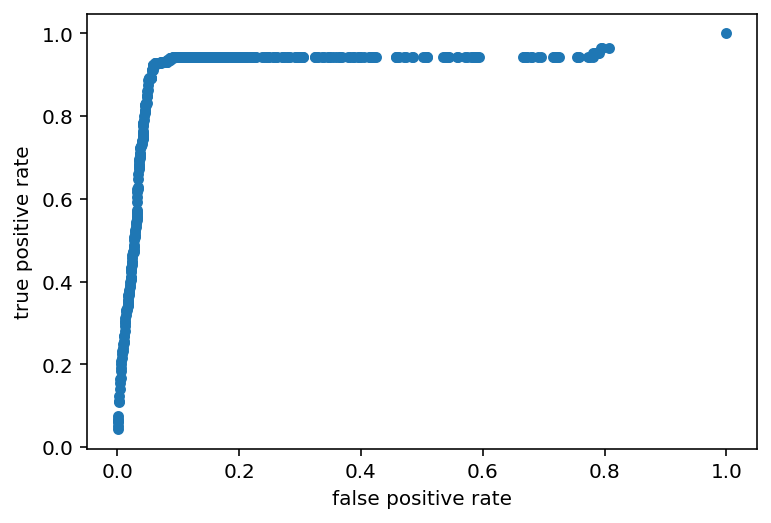

In [15]:
# выводим ROC-кривую для тестовой выборки
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

tmp = forest_model.roc(valid=True)
df = pd.DataFrame({'false positive rate': tmp[0], 
                   'true positive rate': tmp[1]})
df.plot(kind='scatter', 
        x='false positive rate', 
        y='true positive rate');

In [16]:
# вычисляем AUC-ROC для тестовой выборки
forest_model.auc(valid=True)

0.9276565747853592

# 10. Поиск оптимальных значений гиперпараметров по сетке

In [17]:
# импортируем класс H2OGridSearch для выполнения поиска по сетке
from h2o.grid.grid_search import H2OGridSearch
# задаем сетку значений гиперпараметров
hyper_parameters = {'max_depth': [15, 20, 25]}
# создаем экземпляр класса H2OGridSearch
gridsearch = H2OGridSearch(H2ORandomForestEstimator, 
                           grid_id='mygridsearch',
                           hyper_params=hyper_parameters)
# выполняем поиск по сетке
gridsearch.train(predictors, 
                 dependent,
                 ntrees=100,
                 training_frame=tr,
                 nfolds=5,
                 keep_cross_validation_predictions=True, 
                 seed=100);

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
     max_depth             model_ids   logloss
0         15.0  mygridsearch_model_1  0.205550
1         20.0  mygridsearch_model_2  0.315175
2         25.0  mygridsearch_model_3  0.369030


In [18]:
# выводим результаты поиска по сетке
gridsearch

     max_depth             model_ids   logloss
0         15.0  mygridsearch_model_1  0.205550
1         20.0  mygridsearch_model_2  0.315175
2         25.0  mygridsearch_model_3  0.369030


In [19]:
# сортируем результаты поиска по сетке по убыванию AUC
gridperf = gridsearch.get_grid(sort_by='auc', decreasing=True) 
gridperf

     max_depth             model_ids       auc
0         15.0  mygridsearch_model_1  0.891856
1         20.0  mygridsearch_model_2  0.885569
2         25.0  mygridsearch_model_3  0.884606


# 11. Извлечение наилучшей модели по итогам поиска по сетке

In [20]:
# извлекаем наилучшую модель
best_model = gridperf.models[0]

# смотрим AUC наилучшей модели на тестовой выборке
bestmodel_perf = best_model.model_performance(tst)
print(bestmodel_perf.auc())

0.9287609579755988


In [21]:
# завершаем работу с H2O
h2o.cluster().shutdown()

H2O session _sid_af76 closed.
